In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import random

Non-parallel intersections found in data/boards/black_board_difficult_corners.jpg: 200


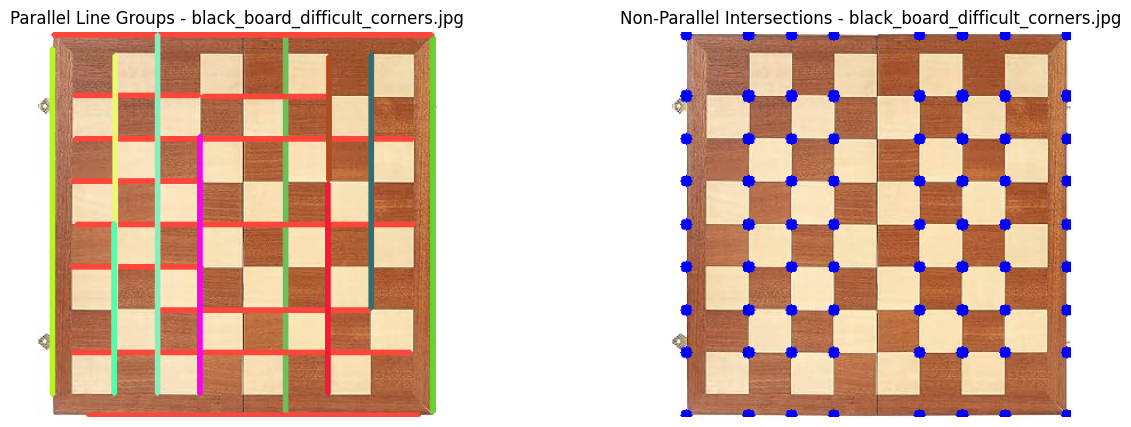

Non-parallel intersections found in data/boards/board_tilted.jpg: 10144


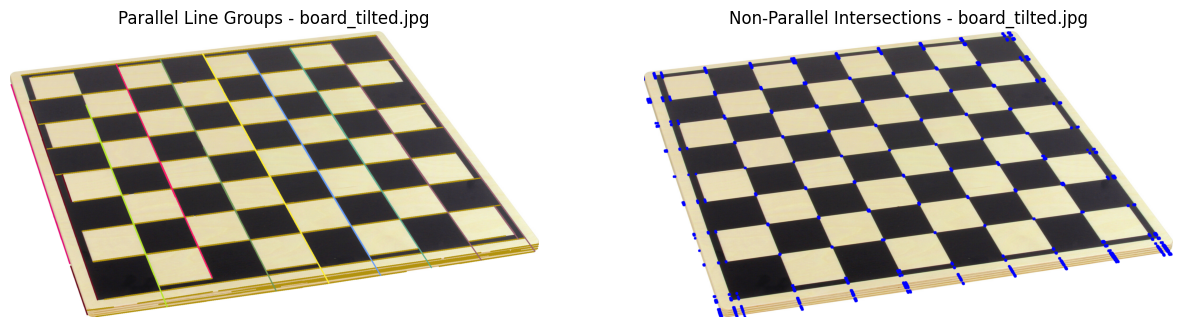

Non-parallel intersections found in data/checkerboards/checkerboard.jpg: 39206


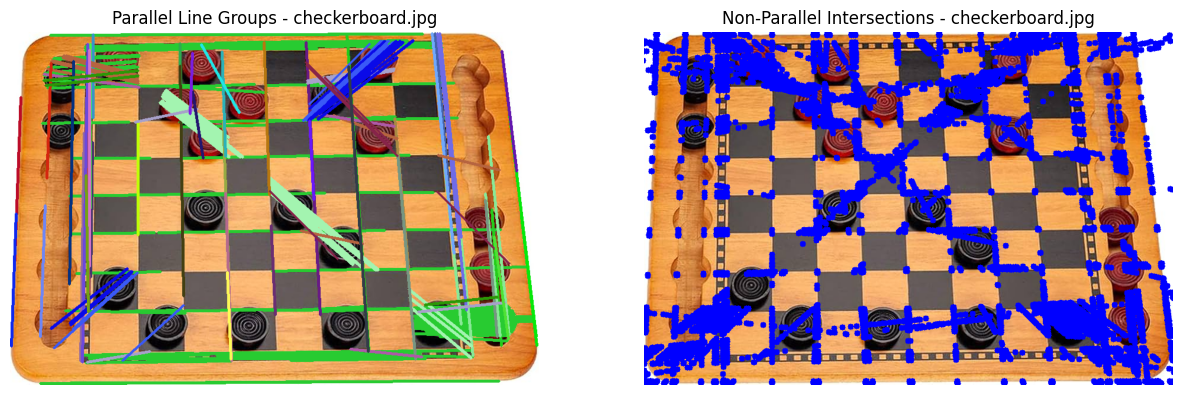

Non-parallel intersections found in data/checkerboards/checkerboard_with_pieces_tilted.jpg: 8072


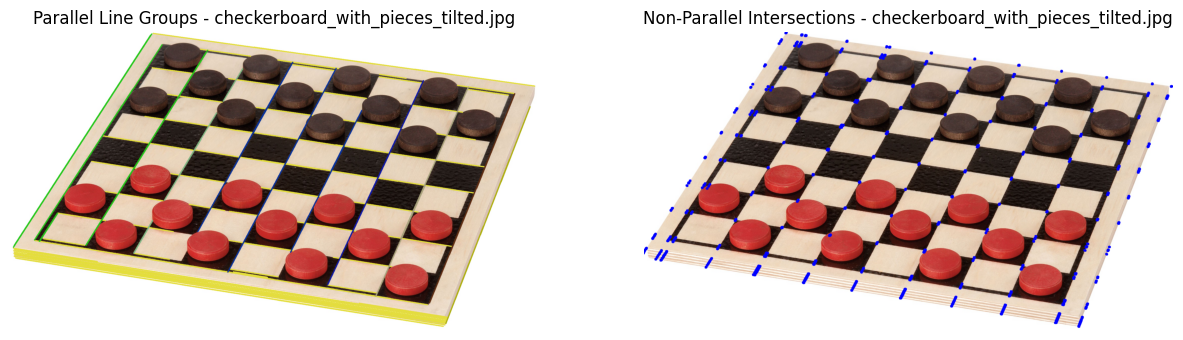

C:\Users\danim\AppData\Local\Temp\ipykernel_14832\3977447760.py:77: RuntimeWarning: overflow encountered in scalar multiply
  return a[0] * b[1] - a[1] * b[0]
C:\Users\danim\AppData\Local\Temp\ipykernel_14832\3977447760.py:77: RuntimeWarning: overflow encountered in scalar subtract
  return a[0] * b[1] - a[1] * b[0]


Non-parallel intersections found in data/chessboard/chessboard_with_pieces_tilted.PNG: 11590


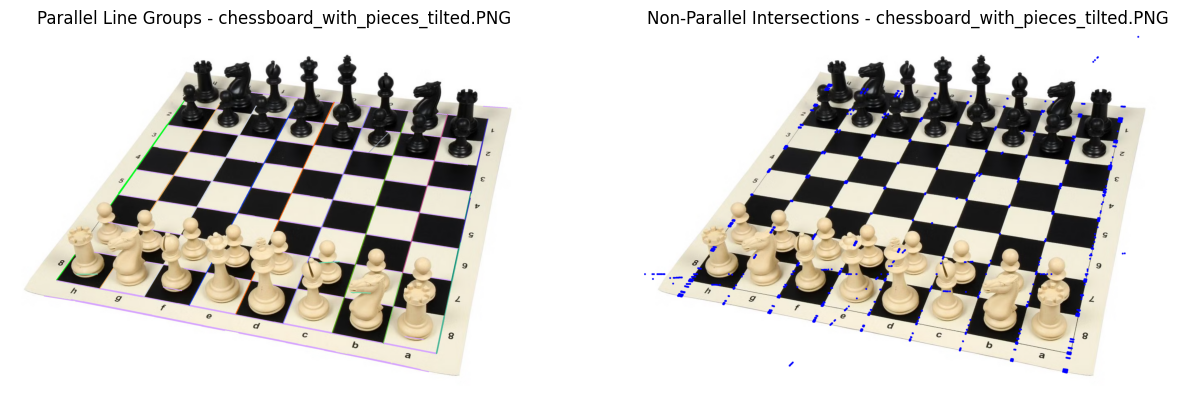

In [3]:
# List of image paths
image_paths = [
    'data/boards/black_board_difficult_corners.jpg',
    'data/boards/board_tilted.jpg',
    'data/checkerboards/checkerboard.jpg',
    'data/checkerboards/checkerboard_with_pieces_tilted.jpg',
    'data/chessboard/chessboard_with_pieces_tilted.PNG'
]

for image_path in image_paths:
    # 1. Read the image
    image = cv2.imread(os.path.relpath(image_path), cv2.IMREAD_COLOR)

    # 2. Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 3. Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # 4. Perform edge detection using the Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)

    # 5. Use the Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=80, minLineLength=100, maxLineGap=30)

    # Ensure lines are detected
    if lines is None:
        print(f"No lines detected in {image_path}.")
        continue

    # 6. Function to calculate slope of a line
    def calculate_slope(x1, y1, x2, y2):
        if x2 - x1 != 0:
            return (y2 - y1) / (x2 - x1)
        else:
            return np.inf  # Vertical lines have infinite slope

    # 7. Group lines that are parallel by slope
    def group_parallel_lines(lines, slope_threshold=0.1):
        groups = []
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = calculate_slope(x1, y1, x2, y2)
            added = False
            for group in groups:
                group_slope = calculate_slope(group[0][0], group[0][1], group[0][2], group[0][3])
                if abs(slope - group_slope) < slope_threshold:
                    group.append(line[0])
                    added = True
                    break
            if not added:
                groups.append([line[0]])
        return groups

    # 8. Group parallel lines
    parallel_groups = group_parallel_lines(lines)

    # 9. Display lines in different colors for each group
    grouped_image = image.copy()
    colors = []

    # Generate random colors for each group
    for _ in range(len(parallel_groups)):
        colors.append([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])

    for i, group in enumerate(parallel_groups):
        for line in group:
            x1, y1, x2, y2 = line
            cv2.line(grouped_image, (x1, y1), (x2, y2), colors[i], thickness=4)

    # 10. Function to find intersection points between two lines
    def line_intersection(line1, line2):
        xdiff = (line1[0] - line1[2], line2[0] - line2[2])
        ydiff = (line1[1] - line1[3], line2[1] - line2[3])

        def det(a, b):
            return a[0] * b[1] - a[1] * b[0]

        div = det(xdiff, ydiff)
        if div == 0:
            return None  # Parallel lines

        d = (det((line1[0], line1[1]), (line1[2], line1[3])), 
             det((line2[0], line2[1]), (line2[2], line2[3])))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
        return int(x), int(y)

    # 11. Find intersections between non-parallel lines only
    intersections = []
    for i, group1 in enumerate(parallel_groups):
        for line1 in group1:
            for j, group2 in enumerate(parallel_groups):
                if i != j:  # Avoid checking within the same group
                    for line2 in group2:
                        intersection = line_intersection(line1, line2)
                        if intersection:
                            intersections.append(intersection)

    print(f"Non-parallel intersections found in {image_path}: {len(intersections)}")

    # 12. Draw intersections as red dots on the original image
    intersections_image = image.copy()
    for intersection in intersections:
        cv2.circle(intersections_image, intersection, 5, (255, 0, 0), -1)  # Red for intersections

    # 13. Display the result with intersections
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(cv2.cvtColor(grouped_image, cv2.COLOR_BGR2RGB))
    axs[0].set_title(f"Parallel Line Groups - {os.path.basename(image_path)}")
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(intersections_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title(f"Non-Parallel Intersections - {os.path.basename(image_path)}")
    axs[1].axis('off')


    plt.show()


In [ ]:
# Hough lines
# Use findChessboardCorners with the correct numaber of internal corners to detect the corners of the chessboard
img = cv2.imread(os.path.relpath('data/boards/black_board_difficult_corners.jpg'), cv2.IMREAD_COLOR)
image = cv2.imread(os.path.relpath('data/boards/board_tilted.jpg'), cv2.IMREAD_COLOR)
imag1 = cv2.imread(os.path.relpath('data/checkerboards/checkerboard.jpg'), cv2.IMREAD_COLOR)

# 2. Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 4. Perform edge detection using the Canny edge detector
edges = cv2.Canny(blurred, 50, 150)

# 5. Use the Hough Line Transform to detect straight lines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Ensure that lines were found
if lines is None:
    print("No lines detected.")
    exit()

# 6. Initialize lists to store the horizontal and vertical lines
horizontal_lines = []
vertical_lines = []

# 7. Sort lines into horizontal and vertical based on their angles (more relaxed filtering)
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    
    # Horizontal lines are close to 0 degrees or 180 degrees
    if -20 < angle < 20 or 160 < angle < 200:
        horizontal_lines.append(line)
    # Vertical lines are close to 90 degrees
    elif 70 < angle < 110:
        vertical_lines.append(line)

# Check if there are enough lines detected
if len(horizontal_lines) < 2 or len(vertical_lines) < 2:
    print("Not enough lines detected to form the chessboard.")
    exit()

# 8. Sort lines by their position to find the outermost lines for the perimeter
horizontal_lines = sorted(horizontal_lines, key=lambda line: line[0][1])
vertical_lines = sorted(vertical_lines, key=lambda line: line[0][0])

# 9. Select the outermost lines for the perimeter
top_line = horizontal_lines[0]
bottom_line = horizontal_lines[-1]
left_line = vertical_lines[0]
right_line = vertical_lines[-1]

# 10. Function to find the intersection point of two lines
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[0][2], line2[0][0] - line2[0][2])
    ydiff = (line1[0][1] - line1[0][3], line2[0][1] - line2[0][3])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return None  # No intersection

    d = (det((line1[0][0], line1[0][1]), (line1[0][2], line1[0][3])), 
         det((line2[0][0], line2[0][1]), (line2[0][2], line2[0][3])))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return int(x), int(y)

# 11. Find the four corners of the chessboard
top_left = line_intersection(top_line, left_line)
top_right = line_intersection(top_line, right_line)
bottom_left = line_intersection(bottom_line, left_line)
bottom_right = line_intersection(bottom_line, right_line)

# Ensure intersections were found
if None in [top_left, top_right, bottom_left, bottom_right]:
    print("Unable to find intersections for the chessboard corners.")
    exit()

# 12. Draw green lines for the chessboard grid
for line in horizontal_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines for grid

for line in vertical_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines for grid

# 13. Draw blue lines around the perimeter of the chessboard
cv2.line(image, top_left, top_right, (255, 0, 0), 2)  # Blue perimeter
cv2.line(image, top_right, bottom_right, (255, 0, 0), 2)  # Blue perimeter
cv2.line(image, bottom_right, bottom_left, (255, 0, 0), 2)  # Blue perimeter
cv2.line(image, bottom_left, top_left, (255, 0, 0), 2)  # Blue perimeter

# 14. Place green dots at the four corners
cv2.circle(image, top_left, 5, (0, 255, 0), -1)
cv2.circle(image, top_right, 5, (0, 255, 0), -1)
cv2.circle(image, bottom_left, 5, (0, 255, 0), -1)
cv2.circle(image, bottom_right, 5, (0, 255, 0), -1)

# 15. Display the result using plt.imshow
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


# Turn into unit normal vectors and calcuate the corss product. For right angles, should be close to 1. For parallel, should be close to 0
